<a href="https://colab.research.google.com/github/sholaypompey/project-sampling/blob/main/10_Milestone_Project_3_Time_series_forecasting_in_Tensorflow(Bit_predict%24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get data

In [1]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 
     

--2022-12-21 21:18:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.005s  

2022-12-21 21:18:09 (33.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



# Importing time series data with pandas

In [2]:
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col= ["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# Let's reduce our data to only closing price per day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns= {"Closing Price (USD)" : "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of bitcoins over time')

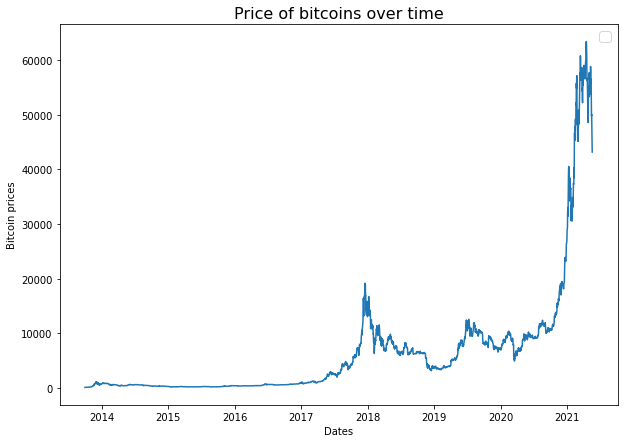

In [5]:
# Let's visualize our bitcion prices
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(bitcoin_prices)
plt.ylabel("Bitcoin prices")
plt.xlabel("Dates")
plt.legend(fontsize = 14)
plt.title("Price of bitcoins over time", fontsize = 16)

# Importing Time Series data using Python's csv module (alternative way of importing cvs data)

In [6]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) # To skip the header

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

btc_price[:10], timesteps[:10]    

([123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116],
 [datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)])

### Another form of reading csv files.

In [7]:
w = "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"
def file_reader(w):
  with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    return f.readlines()


In [8]:
file_reader(w)[:5]

['Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)\n',
 'BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349\n',
 'BTC,2013-10-02,125.455,123.65499,125.7585,123.63383\n',
 'BTC,2013-10-03,108.58483,125.455,125.66566,83.32833\n',
 'BTC,2013-10-04,118.67466,108.58483,118.675,107.05816\n']

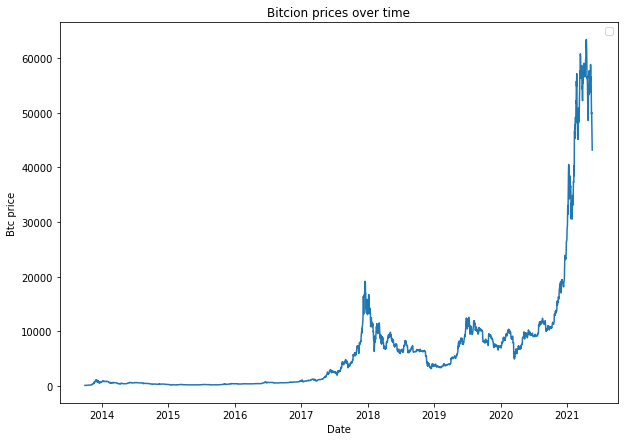

In [9]:
# Let's plot our python csv model
plt.figure(figsize = (10,7))
plt.plot(timesteps, btc_price)
plt.xlabel("Date")
plt.ylabel("Btc price")
plt.title("Bitcion prices over time")
plt.legend();


# Format Data 1: Creating train and test sets of our time series data

In [10]:
len(btc_price), len(timesteps)

(2787, 2787)

In [11]:
# Let's turn our data frame into numpy arrar
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size = 0.2, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

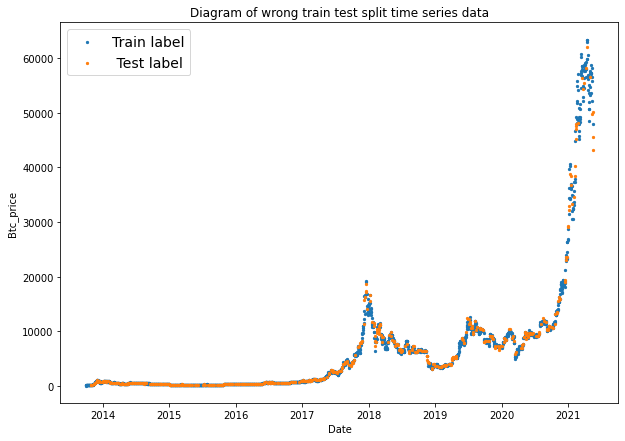

In [13]:
# Let's plot the wrong train and test split
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, s=5, label= "Train label")
plt.scatter(X_test, y_test, s= 5, label =" Test label")
plt.xlabel("Date")
plt.ylabel("Btc_price")
plt.title("Diagram of wrong train test split time series data")
plt.legend(fontsize=14)
plt.show();

# Format 2: Creating train and test sets using indexing

In [14]:
split_size = int(0.8 * len(timesteps))
split_size

2229

In [15]:
X_test, y_test = timesteps[split_size:], prices[split_size:]
X_train, y_train = timesteps[:split_size], prices[:split_size]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

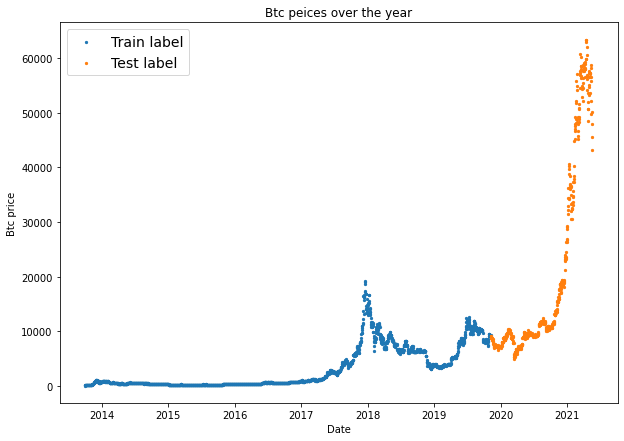

In [16]:
plt.figure(figsize= (10, 7))
plt.scatter(X_train, y_train, s= 5, label = "Train label")
plt.scatter(X_test, y_test, s= 5, label = "Test label")
plt.xlabel("Date")
plt.ylabel("Btc price")
plt.title("Btc peices over the year")
plt.legend(fontsize=14)

# Create function to plot time series data.

In [17]:
def plot_time_series(timesteps, values, format = ".", start = 0, end = None, label= None):
  
  
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Date")
  plt.ylabel("Btc price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)  

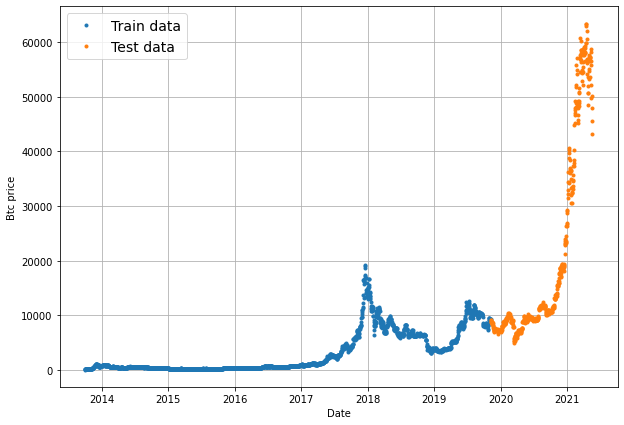

In [18]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, label="Test data")

## Model 0: Naive forecast(baseline)

In [19]:
# Naive model does not need training at all, because all it does is to use a previous data to predict the next data.
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [20]:
y_test[1:][:10]

array([8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
       8760.89271814, 8749.52059102, 8656.97092235, 8500.64355816,
       8469.2608989 , 8537.33965197])

In [21]:
naive_forecast[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

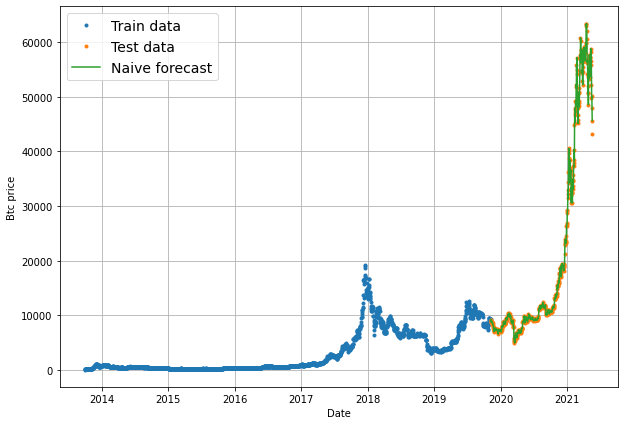

In [22]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, label="Test data")
plot_time_series(X_test[1:], values = naive_forecast, format= "-", label = "Naive forecast")

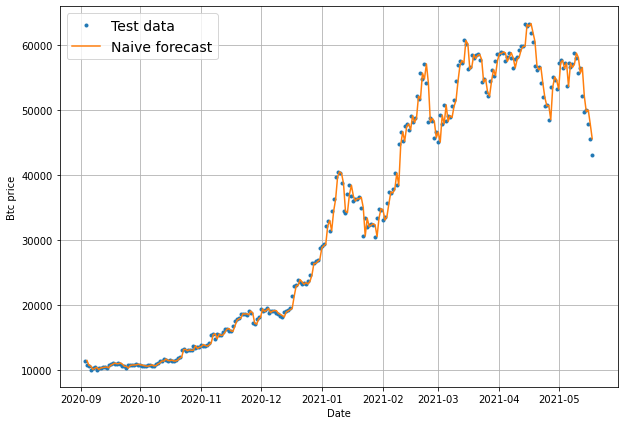

In [23]:
# offset naive forecast
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test, y_test, start= 300, label="Test data")
plot_time_series(X_test[1:], values = naive_forecast, format="-", start=300, label = "Naive forecast")

# Create a function to evaluate our models

In [24]:
# Create a scaled mean absolute error to add to our result evaluation metrics
import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true , y_pred))
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:] , y_true[-1:]))

  return mae/mae_naive

In [25]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9989903220205393

In [26]:
def evaluate_preds(y_true, y_pred):
  # turn data to float32 for metrics calsulations
  y_true = tf.cast(y_true, dtype= tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  # Create all eveluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse  = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mrse= tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "mrse": mrse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [27]:
naive_forecast.dtype, y_test.dtype

(dtype('float64'), dtype('float64'))

In [28]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mrse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.9989904}

# Format data part 2: Windowing Dataset

In [29]:
timesteps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [30]:
# Create our datasets
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 7 # Use a week worth of timesteps to predict the window

def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:,-horizon:]

In [31]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis = 0))
print(f"Window: {tf.squeeze(test_window)} -> Label: {tf.squeeze(test_label)}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [32]:
# Create a function to build numpy arrays as windowns
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  # Plot naive forecast
  window_steps = np.expand_dims(np.arange(window_size + horizon), axis = 0)
  print(f"Window steps: {window_steps}")
  window_indexes = window_steps + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis = 0).T
  #print(f"Window index:\n {window_indexes[:3]} -> {window_indexes[-3:]} -> {window_indexes.shape}")
  windowed_arrays = x[window_indexes]
  windows, labels = get_labelled_window(windowed_arrays, horizon)

  return windows, labels

In [33]:
full_windows, full_labels = make_windows(prices, window_size=7, horizon=1)
len(full_windows), len(full_labels)

Window steps: [[0 1 2 3 4 5 6 7]]


(2780, 2780)

In [34]:
# View the first 3 windows and labels
for i in range(3):
  print(f"Windows: {full_windows[i]} -> label: {full_labels[i]}")

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> label: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> label: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> label: [125.96116]


In [35]:
# View the last 3 windows and labels
for i in range(3):
  print(f"Windows: {full_windows[i-3]} -> label: {full_labels[i-3]}")

Windows: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> label: [47885.62525472]
Windows: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> label: [45604.61575361]
Windows: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> label: [43144.47129086]


# Turning windows into training and test sets

In [36]:
def make_train_test_splits(windows, labels, test_split = 0.2):
  split_size = int(len(windows) * (1- test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [37]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [38]:
train_windows[:2], train_labels[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ]]), array([[123.033],
        [124.049]]))

In [39]:
test_windows[:2], test_labels[:2]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463]]),
 array([[8798.04205463],
        [9081.18687849]]))

In [40]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

# Create a Model checkpoint callback

In [41]:
import os
def create_model_checkpoint_callback(model_name, save_path= "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath= os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

## Model 1: Dense Model(window= 7, horizon=1)

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation= "relu"),
    layers.Dense(HORIZON, activation= "linear")  # linear activation is like not having activation
], name = "model_1_dense")

# Compile the model
model_1.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam())

# Fit the model
history_model_1 = model_1.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint_callback(model_name= model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 48ms/step - loss: 780.3469 - val_loss: 2279.5828
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 247.6765 - val_loss: 1005.9865
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 188.4107 - val_loss: 923.2861
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 169.4334 - val_loss: 900.5931
Epoch 5/100
18/18 [==============================] - 0s 24ms/step - loss: 165.0900 - val_loss: 895.2404
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 158.5206 - val_loss: 855.1868
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 151.3568 - val_loss: 840.9289
Epoch 8/100
18/18 [==============================] - 0s 25ms/step - loss: 145.2560 - val_loss: 803.6005
Epoch 9/100
18/18 [==============================] - 0s 26ms/step - loss: 144.3546 - val_loss: 799.5592
Epoch 10/100
18/18 [==============================] - 0s 25ms/

In [43]:
# Evaluate our model
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 662.5322


662.5322265625

In [44]:
# Load our best saved model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 568.5499


568.5498657226562

In [45]:
# Make prediction with our model
model_1_preds = model_1.predict(test_windows)
model_1_preds[:5]

18/18 [==============================] - 0s 968us/step


array([[8874.493],
       [8789.944],
       [9040.986],
       [8804.829],
       [8741.21 ]], dtype=float32)

In [46]:
test_labels.shape, model_1_preds.shape

((556, 1), (556, 1))

In [47]:
# Evalaute results
model_1_results = evaluate_preds(y_true= tf.squeeze(test_labels),
                                 y_pred = tf.squeeze(model_1_preds))
model_1_results

{'mae': 568.5498,
 'mse': 1172587.4,
 'mrse': 1082.8607,
 'mape': 2.549229,
 'mase': 0.9989879}

In [48]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mrse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.9989904}

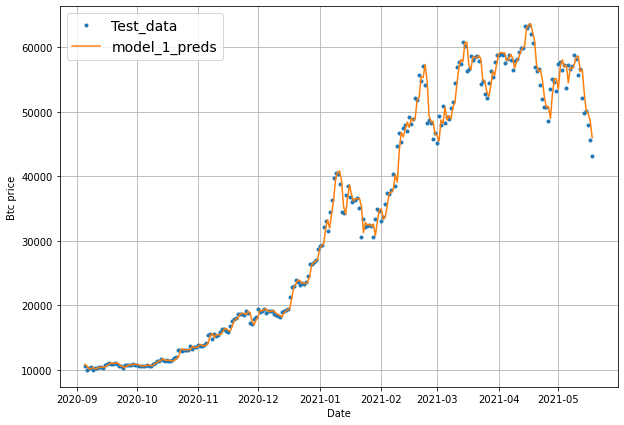

In [49]:
# Compare the 2 results using plot
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense(windows = 30, horizon = 1

In [50]:
HORIZON = 1
WINDOW_SIZE = 30

In [51]:
# Make new windows and labels with our new parameters
full_windows, full_labels = make_windows(prices, window_size=30, horizon=1)
len(full_windows), len(full_labels)

Window steps: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]


(2757, 2757)

In [52]:
# Make train and test datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [53]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(1)
], name = "model_2_dense")

model_2.compile(loss="mae",
                optimizer= tf.keras.optimizers.Adam())

history_model_2 = model_2.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              verbose = 1,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint_callback(model_name= model_2.name)])

Epoch 1/100
69/69 [==============================] - 1s 9ms/step - loss: 452.9573 - val_loss: 1612.1146
Epoch 2/100
69/69 [==============================] - 0s 7ms/step - loss: 203.3967 - val_loss: 1515.5787
Epoch 3/100
69/69 [==============================] - 1s 7ms/step - loss: 217.5900 - val_loss: 1220.7611
Epoch 4/100
69/69 [==============================] - 0s 1ms/step - loss: 179.9106 - val_loss: 1281.1294
Epoch 5/100
69/69 [==============================] - 0s 7ms/step - loss: 185.4995 - val_loss: 1064.3695
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 183.0331 - val_loss: 1075.5713
Epoch 7/100
69/69 [==============================] - 0s 7ms/step - loss: 188.4272 - val_loss: 982.5351
Epoch 8/100
69/69 [==============================] - 0s 7ms/step - loss: 160.1765 - val_loss: 841.1382
Epoch 9/100
69/69 [==============================] - 0s 2ms/step - loss: 147.3812 - val_loss: 848.9302
Epoch 10/100
69/69 [==============================] - 1s 11ms/step 

In [54]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 623.6259


623.6258544921875

In [55]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 969us/step - loss: 584.7894


584.7894287109375

In [56]:
model_2_preds = model_2.predict(test_windows)
model_2_preds[:5]

18/18 [==============================] - 0s 1ms/step


array([[8855.795],
       [8855.393],
       [8757.905],
       [8596.966],
       [8446.127]], dtype=float32)

In [57]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_2_preds))
model_2_results

{'mae': 584.7895,
 'mse': 1208050.8,
 'mrse': 1099.1136,
 'mape': 2.6406455,
 'mase': 0.9989731}

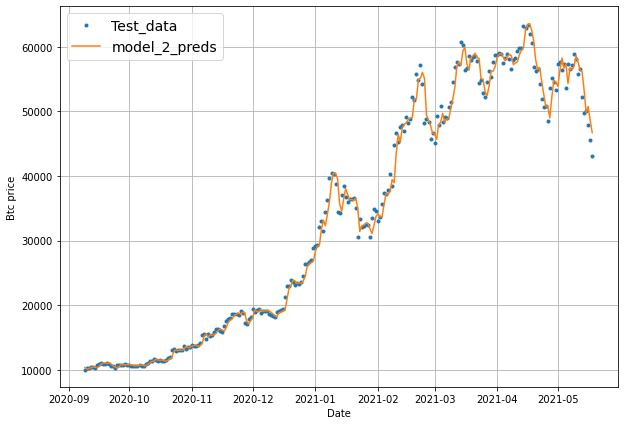

In [58]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense( windows = 30, horizon = 7)

In [59]:
HORIZON  = 7
WINDOW_SIZE = 30

In [60]:
full_windows , full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window steps: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]


(2751, 2751)

In [61]:
train_windows, test_windows,train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [62]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name = "model_3_dense")

model_3.compile(loss="mae",
                optimizer= tf.keras.optimizers.Adam())
history_model_3 = model_3.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint_callback(model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 28ms/step - loss: 1476.6801 - val_loss: 3088.5388
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 552.8871 - val_loss: 2462.5020
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 435.1955 - val_loss: 2282.7729
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 391.9522 - val_loss: 1980.5011
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 357.7267 - val_loss: 1985.0291
Epoch 6/100
18/18 [==============================] - 0s 22ms/step - loss: 332.7856 - val_loss: 1754.1520
Epoch 7/100
18/18 [==============================] - 0s 26ms/step - loss: 309.8981 - val_loss: 1590.3005
Epoch 8/100
18/18 [==============================] - 1s 45ms/step - loss: 302.8700 - val_loss: 1565.3330
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 293.6388 - val_loss: 1611.2914
Epoch 10/100
18/18 [==============================] - 0s

In [63]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1297.3754


1297.3753662109375

In [64]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1236.2075


1236.20751953125

In [65]:
model_3_preds = model_3.predict(test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


array([[9066.453 , 9334.446 , 9461.401 , 9388.391 , 9463.582 , 9670.427 ,
        9430.584 ],
       [8755.7295, 9083.715 , 9226.223 , 8985.109 , 9058.751 , 9266.0625,
        9211.953 ],
       [8716.3545, 9035.204 , 9130.837 , 8909.687 , 9015.347 , 9136.23  ,
        9121.998 ],
       [8914.29  , 9065.095 , 9077.667 , 9093.83  , 9053.94  , 9326.763 ,
        9151.856 ],
       [8814.659 , 9023.546 , 8928.278 , 8960.1   , 9191.008 , 9366.611 ,
        9029.211 ]], dtype=float32)

In [66]:
# Create evaluation preds for model 3 because of chnage in window size
def evaluate_preds(y_true, y_pred):
  # turn data to float32 for metrics calsulations
  y_true = tf.cast(y_true, dtype= tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  # Create all eveluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse  = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mrse= tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Create a conditional statement to suit models with different parameters
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    mrse = tf.reduce_mean(mrse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "mrse": mrse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [67]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_3_preds))
model_3_results

{'mae': 1236.2075,
 'mse': 5459194.0,
 'mrse': 1421.6143,
 'mape': 5.5906534,
 'mase': 0.9989825}

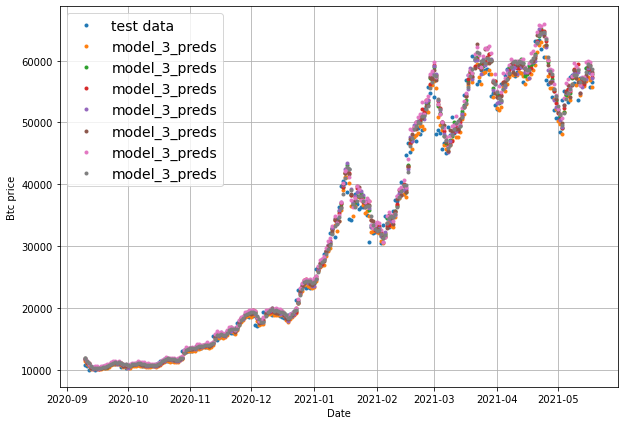

In [68]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps= X_test[-len(test_windows):], values = test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps= X_test[-len(test_windows):], values = model_3_preds, start=offset, label="model_3_preds")


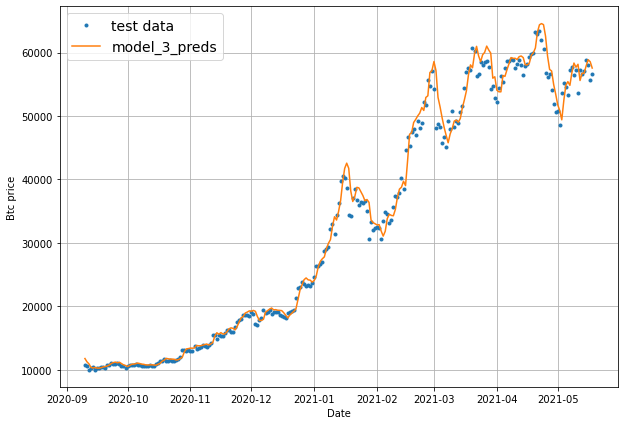

In [69]:
# Plot with aggregated model_preds
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps= X_test[-len(test_windows):], values = test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps= X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis = 1), start=offset, format="-", label="model_3_preds")


# Which of our model is performing best so far

In [70]:
models = pd.DataFrame({
    "naive model" : naive_results["mae"],
    "mae_model_1" : model_1_results["mae"],
    "mae_model_2" : model_2_results["mae"],
    "mae_model_3" : model_3_results["mae"]
}, index= ["mae"])
models

,naive model,mae_model_1,mae_model_2,mae_model_3
mae,567.980225,568.549805,584.78949,1236.20752


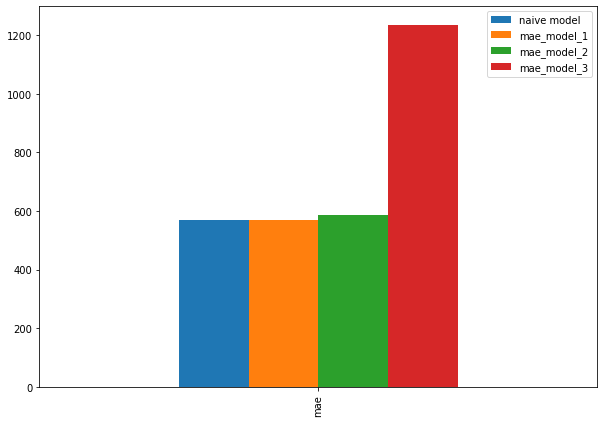

In [71]:
models.plot(kind="bar", figsize=(10,7)) # The lower the mae, the best the model performs

## Model 4: Conv1D

In [72]:
# We need to recreate our datasets
HORIZON = 1
WINDOW_SIZE = 7

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon= HORIZON)
len(full_windows), len(full_labels)

Window steps: [[0 1 2 3 4 5 6 7]]


(2780, 2780)

In [73]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [74]:
tf.constant(train_windows[0]), train_windows[0].shape

(<tf.Tensor: shape=(7,), dtype=float64, numpy=
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ])>, (7,))

In [75]:
# We need to introduce Lambda to our layers to reshape our input dimensions
x = tf.constant(train_windows[0])
lambda_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(x)
print(f"Original shape: {x.shape}")
print(f"Lambda expanded shape: {lambda_layer.shape}")
print(f"Expanded layers: {lambda_layer}")

Original shape: (7,)
Lambda expanded shape: (7, 1)
Expanded layers: [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [76]:
tf.random.set_seed(42)

inputs = layers.Input(shape=WINDOW_SIZE, dtype= tf.float64)
lambda_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.Conv1D(filters=128, kernel_size=5, padding = "causal", activation= "relu")(lambda_layer)
outputs = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs, outputs, name= "model_4_Conv1D")

model_4.compile(loss="mae",
                optimizer= tf.keras.optimizers.Adam())

history_model_4 = model_4.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint_callback(model_4.name)])


Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 2845.7554

18/18 [==============================] - 1s 48ms/step - loss: 1207.3885 - val_loss: 2320.5459
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 353.1842

18/18 [==============================] - 1s 38ms/step - loss: 316.2140 - val_loss: 1467.3311
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 191.0313

18/18 [==============================] - 1s 39ms/step - loss: 192.6844 - val_loss: 1164.7461
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 228.4323

18/18 [==============================] - 1s 39ms/step - loss: 177.3536 - val_loss: 981.6826
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 169.5924

18/18 [==============================] - 1s 38ms/step - loss: 172.3469 - val_loss: 960.8795
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 130.1247

18/18 [==============================] - 1s 36ms/step - loss: 171.9752 - val_loss: 950.1937
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 209.6358

18/18 [==============================] - 1s 57ms/step - loss: 167.1943 - val_loss: 943.3042
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 143.1064

18/18 [==============================] - 1s 40ms/step - loss: 163.5994 - val_loss: 905.5258
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 162.5452 - val_loss: 929.7835
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 176.2636

18/18 [==============================] - 1s 36ms/step - loss: 158.5783 - val_loss: 871.9853
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 172.6832

18/18 [==============================] - 1s 37ms/step - loss: 154.0055 - val_loss: 852.7190
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 151.2621 - val_loss: 944.2296
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 150.2687 - val_loss: 881.2108
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 157.3270

18/18 [==============================] - 1s 38ms/step - loss: 145.4592 - val_loss: 849.2067
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 143.7789

18/18 [==============================] - 1s 38ms/step - loss: 143.3642 - val_loss: 844.4287
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 131.3070

18/18 [==============================] - 1s 36ms/step - loss: 139.8762 - val_loss: 806.7508
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 138.1675 - val_loss: 812.6640
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 147.8447

18/18 [==============================] - 1s 38ms/step - loss: 137.9499 - val_loss: 775.2330
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 79.5908

18/18 [==============================] - 1s 35ms/step - loss: 131.1451 - val_loss: 755.4479
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0257

18/18 [==============================] - 1s 35ms/step - loss: 132.4056 - val_loss: 712.1982
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 162.8849

18/18 [==============================] - 1s 35ms/step - loss: 131.0830 - val_loss: 707.4222
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 177.5312

18/18 [==============================] - 1s 35ms/step - loss: 126.9677 - val_loss: 692.5481
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 132.6548

18/18 [==============================] - 1s 59ms/step - loss: 125.1869 - val_loss: 685.2979
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 133.2069

18/18 [==============================] - 1s 38ms/step - loss: 123.9248 - val_loss: 670.9752
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 125.0656

18/18 [==============================] - 1s 65ms/step - loss: 122.2450 - val_loss: 662.3439
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 121.2728

18/18 [==============================] - 1s 71ms/step - loss: 121.1394 - val_loss: 654.4514
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 169.1692

18/18 [==============================] - 1s 66ms/step - loss: 121.0952 - val_loss: 646.9713
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 112.3583

18/18 [==============================] - 1s 36ms/step - loss: 117.9507 - val_loss: 644.0071
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 113.2701

18/18 [==============================] - 1s 38ms/step - loss: 116.9190 - val_loss: 642.6725
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 133.1726

18/18 [==============================] - 1s 38ms/step - loss: 121.8659 - val_loss: 629.5991
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 114.7007 - val_loss: 640.6924
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 111.4923

18/18 [==============================] - 1s 43ms/step - loss: 115.8331 - val_loss: 622.1506
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 115.7185 - val_loss: 656.7964
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 140.5297

18/18 [==============================] - 1s 38ms/step - loss: 117.4010 - val_loss: 612.7388
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 113.2624 - val_loss: 613.9559
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 159.4264

18/18 [==============================] - 1s 38ms/step - loss: 117.0075 - val_loss: 605.2272
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1192 - val_loss: 613.4613
Epoch 38/100
18/18 [==============================] - 0s 3ms/step - loss: 114.0888 - val_loss: 617.4557
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 131.7166

18/18 [==============================] - 1s 60ms/step - loss: 113.8287 - val_loss: 599.6378
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 112.1102 - val_loss: 601.0756
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 111.7129 - val_loss: 642.4760
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 117.4614 - val_loss: 628.8831
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 114.9637 - val_loss: 626.2314
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 113.7044 - val_loss: 601.3557
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 110.2300 - val_loss: 602.2664
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 110.8421 - val_loss: 601.6515
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 111.1995 - val_loss: 679.1381
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 11

18/18 [==============================] - 1s 38ms/step - loss: 111.4164 - val_loss: 590.2225
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 112.2794 - val_loss: 599.6577
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6150 - val_loss: 637.6078
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 105.7542

18/18 [==============================] - 1s 50ms/step - loss: 110.0329 - val_loss: 589.3808
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 128.5007

18/18 [==============================] - 1s 52ms/step - loss: 113.4552 - val_loss: 587.1552
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7108 - val_loss: 816.9901
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 135.7503 - val_loss: 719.3806
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 122.0247 - val_loss: 735.9521
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 112.3813 - val_loss: 600.9777
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 111.0364 - val_loss: 648.7866
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4802 - val_loss: 590.3774
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 74.8056

18/18 [==============================] - 1s 39ms/step - loss: 107.9389 - val_loss: 576.8008
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2602 - val_loss: 607.2755
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 109.6901 - val_loss: 596.7834
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 109.3035 - val_loss: 591.7098
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 108.8017 - val_loss: 578.0851
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 107.3419 - val_loss: 655.8540
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2484 - val_loss: 669.3168
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 130.1730 - val_loss: 704.8604
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 135.1638

18/18 [==============================] - 1s 38ms/step - loss: 122.0592 - val_loss: 574.0012
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6805 - val_loss: 582.4785
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 97.4702

18/18 [==============================] - 1s 38ms/step - loss: 108.5809 - val_loss: 573.2568
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 111.4726 - val_loss: 639.7592
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 174.5227

18/18 [==============================] - 1s 38ms/step - loss: 108.1881 - val_loss: 572.1607
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 108.2999 - val_loss: 586.2969
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3541 - val_loss: 572.9820
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 107.8668 - val_loss: 572.5251
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7326 - val_loss: 574.9955
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 107.1027 - val_loss: 593.1469
Epoch 80/100
18/18 [==============================] - 0s 3ms/step - loss: 108.1535 - val_loss: 585.9691
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0599 - val_loss: 572.7422
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 117.6359 - val_loss: 604.6208
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 11

18/18 [==============================] - 1s 40ms/step - loss: 107.9166 - val_loss: 571.9283
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 107.2452 - val_loss: 592.6498
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 106.7613 - val_loss: 604.2856
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7547 - val_loss: 584.0389
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 106.5926 - val_loss: 572.7335
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 106.1901 - val_loss: 577.0853
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 109.8442 - val_loss: 595.3208
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1011 - val_loss: 585.5007
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 115.8956 - val_loss: 643.3029
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 11

18/18 [==============================] - 1s 37ms/step - loss: 106.6255 - val_loss: 571.3428
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5560 - val_loss: 627.1014
Epoch 97/100
18/18 [==============================] - 0s 3ms/step - loss: 107.7741 - val_loss: 589.1556
Epoch 98/100
18/18 [==============================] - 0s 2ms/step - loss: 107.1832 - val_loss: 574.5533
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 153.1043

18/18 [==============================] - 1s 37ms/step - loss: 107.1678 - val_loss: 569.0327
Epoch 100/100
18/18 [==============================] - 0s 3ms/step - loss: 110.9699 - val_loss: 624.1894


In [77]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 624.1894


624.1893920898438

In [79]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.0327


569.03271484375

In [80]:
model_4_preds = model_4.predict(test_windows)
model_4_preds[:5]

18/18 [==============================] - 0s 1ms/step


array([[[8847.293]],

       [[8757.502]],

       [[8997.469]],

       [[8762.801]],

       [[8707.723]]], dtype=float32)

In [81]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_4_preds))
model_4_results

{'mae': 569.0327,
 'mse': 1169841.2,
 'mrse': 1081.592,
 'mape': 2.551526,
 'mase': 0.9989879}

## Model 5: RNN(LSTM)

In [82]:
tf.random.set_seed(42)

inputs = layers.Input(shape=WINDOW_SIZE, dtype= tf.float64)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, activation= "relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name= "model_5_LSTM")

model_5.compile(loss="mae",
                optimizer= tf.keras.optimizers.Adam())

history_model_5 = model_4.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint_callback(model_5.name)])


Epoch 1/100
 1/18 [>.............................] - ETA: 5s - loss: 111.2573

18/18 [==============================] - 1s 42ms/step - loss: 121.3397 - val_loss: 604.4608
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 82.7360

18/18 [==============================] - 1s 40ms/step - loss: 106.7138 - val_loss: 568.7081
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 107.3442 - val_loss: 570.1588
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 112.5319 - val_loss: 594.1519
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 110.5512 - val_loss: 628.9835
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 109.6039 - val_loss: 587.3749
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 107.8561 - val_loss: 632.5548
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 109.9219 - val_loss: 610.3442
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 108.1948 - val_loss: 570.2101
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 112.8468 - val_loss: 576.3378
Epoch 11/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4702 

18/18 [==============================] - 1s 38ms/step - loss: 105.3135 - val_loss: 567.4260
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 106.0755 - val_loss: 578.5641
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 106.7834 - val_loss: 580.0879
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 107.2472 - val_loss: 618.4627
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 108.2349 - val_loss: 585.3486
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 107.2583 - val_loss: 622.6119
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 108.7840 - val_loss: 602.8784
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 113.8893 - val_loss: 676.6914
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 109.9418 - val_loss: 659.7273
Epoch 49/100
18/18 [==============================] - 0s 3ms/step - loss: 11

18/18 [==============================] - 1s 40ms/step - loss: 110.7629 - val_loss: 566.5291
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 107.4211 - val_loss: 570.5452
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 107.4606 - val_loss: 608.1662
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 103.8626

18/18 [==============================] - 1s 38ms/step - loss: 108.3045 - val_loss: 566.4238
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 109.5791 - val_loss: 567.2697
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 105.0159 - val_loss: 712.8093
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 114.5254 - val_loss: 612.2495
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 111.6489 - val_loss: 569.7604
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 106.9147 - val_loss: 578.3852
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 108.3167 - val_loss: 629.8414
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 110.4519 - val_loss: 590.5353
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 108.3725 - val_loss: 569.1771
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 10

18/18 [==============================] - 1s 40ms/step - loss: 106.7648 - val_loss: 565.5869
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 104.9688 - val_loss: 571.6548
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 104.7579 - val_loss: 678.7958
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6010 - val_loss: 676.3145
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 120.3291 - val_loss: 629.5146
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 122.3980 - val_loss: 592.3094
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6898 - val_loss: 599.7371
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 107.4680 - val_loss: 580.1716
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 107.0687 - val_loss: 572.5424
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 10

In [83]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 965us/step - loss: 565.5869


565.5868530273438

In [84]:
model_5_preds = model_5.predict(test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 927us/step


array([[[8843.128]],

       [[8774.062]],

       [[9035.042]],

       [[8770.314]],

       [[8727.98 ]]], dtype=float32)

In [85]:
model_5_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_5_preds))
model_5_results

{'mae': 565.5868,
 'mse': 1158285.5,
 'mrse': 1076.2367,
 'mape': 2.5370183,
 'mase': 0.9989879}

In [86]:
naive_results, model_1_results

({'mae': 567.9802,
  'mse': 1147547.0,
  'mrse': 1071.2362,
  'mape': 2.5165248,
  'mase': 0.9989904},
 {'mae': 568.5498,
  'mse': 1172587.4,
  'mrse': 1082.8607,
  'mape': 2.549229,
  'mase': 0.9989879})

# Make a multi variate time series.

In [87]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


# The following block rewards and dates were sourced from cmcmarkets.com.

Block Reward  	Start Date

50            	3 January 2009 (2009-01-03)

25            	28 November 2012

12.5           	9 July 2016

6.25          	11 May 2020

3.125         	TBA (expected 2024)

1.5625        	TBA (expected 2028

In [88]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

# Let's create datetime for our block reward
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [89]:
bitcoin_prices_block = bitcoin_prices.copy()
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices_block.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices_block.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [90]:
# Let's add a new column to our dataframe
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

bitcoin_prices_block.head(), bitcoin_prices_block.tail()

(                Price block_reward
 Date                              
 2013-10-01  123.65499           25
 2013-10-02  125.45500           25
 2013-10-03  108.58483           25
 2013-10-04  118.67466           25
 2013-10-05  121.33866           25,                    Price block_reward
 Date                                 
 2021-05-14  49764.132082         6.25
 2021-05-15  50032.693137         6.25
 2021-05-16  47885.625255         6.25
 2021-05-17  45604.615754         6.25
 2021-05-18  43144.471291         6.25)

In [91]:
# Let view our new dataset
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                      columns = bitcoin_prices_block.columns,
                                      index = bitcoin_prices_block.index)
scaled_price_block_df[:5]

,Price,block_reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0


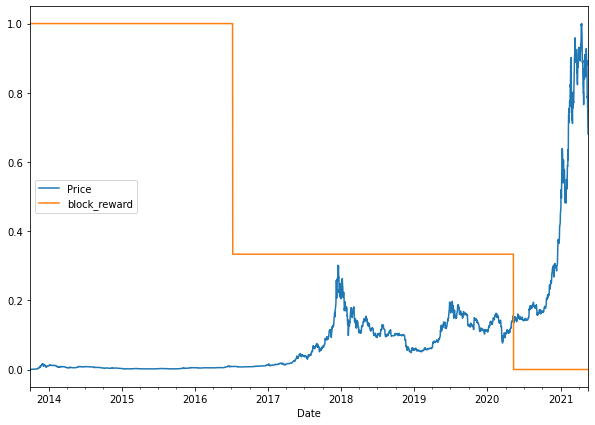

In [92]:
scaled_price_block_df.plot(figsize=(10,7));

# Making a windowed dataset with pandas

In [93]:
HORIZON = 1
WINDOW_SIZE = 7

# Since our datasets is in pandas dataframe, we will use shift method to create windowed multivariate time series.
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i+1)

bitcoin_prices_windowed[:10]


,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [94]:
# Let's drop the Nan
bitcoin_prices_windowed.dropna(inplace = True)
bitcoin_prices_windowed

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-08,123.033000,25,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
2013-10-09,124.049000,25,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2013-10-10,125.961160,25,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
2013-10-11,125.279660,25,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
2013-10-12,125.927500,25,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [95]:
# Let's create X and y
X = bitcoin_prices_windowed.drop("Price", axis = 1).astype(np.float32)
y = bitcoin_prices_windowed["Price"].astype(np.float32)
X.head()

,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [96]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [97]:
# Create train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size] , y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_test), len(X_train), len(y_test), len(y_train)

(556, 2224, 556, 2224)

# Model 6: Dense (Multivariate time series)

In [98]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_6_dense_multivariate")

# Compile the model
model_6.compile(loss= "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
history_model_6 = model_6.fit(X_train,
                              y_train,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (X_test, y_test),
                              callbacks = [create_model_checkpoint_callback(model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 49ms/step - loss: 1234.6881 - val_loss: 2061.8193
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 351.5003 - val_loss: 1908.7340
Epoch 3/100
18/18 [==============================] - 0s 23ms/step - loss: 235.4110 - val_loss: 1329.5334
Epoch 4/100
18/18 [==============================] - 0s 24ms/step - loss: 208.6456 - val_loss: 1102.0096
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 196.5595 - val_loss: 1108.6183
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 187.2317 - val_loss: 1035.9946
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 182.0120 - val_loss: 1019.2755
Epoch 8/100
18/18 [==============================] - 0s 25ms/step - loss: 175.6998 - val_loss: 977.7363
Epoch 9/100
18/18 [==============================] - 0s 28ms/step - loss: 170.1650 - val_loss: 953.9060
Epoch 10/100
18/18 [==============================] - 0s 

In [99]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 567.8292


567.8291625976562

In [100]:
model_6_preds = model_6.predict(X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 1ms/step


array([[8844.084],
       [8769.791],
       [9048.283],
       [8748.914],
       [8731.422]], dtype=float32)

In [101]:
model_6_results = evaluate_preds(tf.squeeze(y_test), tf.squeeze(model_6_preds))
model_6_results

{'mae': 567.82916,
 'mse': 1163727.5,
 'mrse': 1078.762,
 'mape': 2.546015,
 'mase': 0.9989879}

In [102]:
model_1_results

{'mae': 568.5498,
 'mse': 1172587.4,
 'mrse': 1082.8607,
 'mape': 2.549229,
 'mase': 0.9989879}

## Model 7: N-BEATS Algorithms

N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting) algorithm.

In [103]:
# Building and testing an N-BEATs block layers

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon   : int,
               n_neurons : int,
               n_layers  : int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon  = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers


    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation= "linear", name = "theta")
    
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
      theta = self.theta_layer(x)
      backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
      return backcast, forecast  

In [104]:
# Set up the dummy NbeatsBlock layers to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(
    input_size=WINDOW_SIZE,
    theta_size = WINDOW_SIZE + HORIZON,
    horizon = HORIZON,
    n_neurons = 128,
    n_layers = 4
)

In [105]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [106]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.18105811  2.9291494  -0.01894116 -1.312921   -1.7796531   1.1924349
 -1.2437687 ]
Forecast: 1.1991428136825562


# Preparing data for Nbeats Algorithms using tf.data

In [107]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [108]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis =1)
y = bitcoin_prices_nbeats.dropna()["Price"]
X.head()

,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,
2013-10-08,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [109]:
y.head()

Date
2013-10-08    123.03300
2013-10-09    124.04900
2013-10-10    125.96116
2013-10-11    125.27966
2013-10-12    125.92750
Name: Price, dtype: float64

In [110]:
# Let's split the data
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [111]:
# Let's convert our data into tensorflow tf.data.Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_combined_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_combined_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

train_dataset = train_combined_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = test_combined_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

In [112]:
train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

# Setting up parameters for Nbeats algorithms

In [113]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE
     

(7, 8)

# Getting ready for residual connections
Beautiful! Hyperparameters ready, now before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.

They're what make N-BEATS double residual stacking (section 3.2 of the N-BEATS paper) possible:

tf.keras.layers.subtract(inputs) - subtracts list of input tensors from each other
tf.keras.layers.add(inputs) - adds list of input tensors to each other
Let's try them out.

In [114]:
# Let's make tensor
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.add([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Added: {added.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Added: [10 12 14 16 18 20 22 24 26 28]
Subtracted: [10 12 14 16 18 20 22 24 26 28]


# Building, compilling and building the NBeats Algorithms

In [115]:
%%time
tf.random.set_seed(42)

# 1. Set up NBeats layer
nbeats_block_layer = NBeatsBlock(
    input_size = INPUT_SIZE,
    theta_size = THETA_SIZE,
    horizon = HORIZON,
    n_neurons = N_NEURONS,
    n_layers = N_LAYERS,
    name = "initial_block")

# 2. Stack the initial inputs
stack_input = layers.Input(shape=INPUT_SIZE, name = "stack_input")

# 3. create initial backcast and forecast
backcast, forecast = nbeats_block_layer(stack_input)

# 4. create residual
residuals = layers.subtract([stack_input, backcast], name=f"subract_00")

# 5. create blocks of layers
for i, _ in enumerate(range(N_STACKS - 1)):
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"Nbeats_{i}"
  )(residuals)

# 6. create backcast and forecast
residuals = layers.subtract([residuals, backcast], name = f"Subtract_{i}")
forecast = layers.add([forecast, block_forecast], name = f"Add_{i}")

# 7. Create the model
model_7 = tf.keras.Model(inputs = stack_input,
                         outputs = forecast, name = "NbeatsBlock_Model")

# 8. Compile the model
model_7.compile(loss= "mae",
                optimizer= tf.keras.optimizers.Adam(0.001),
                metrics = ["mae", "mse"])
# 9. Fit the model
history_model_7 = model_7.fit(train_dataset,
                              epochs = N_EPOCHS,
                              verbose = 1,
                              validation_data = test_dataset,
                              callbacks = [#create_model_checkpoint_callback("model_experiments/model_7.name"),
                                           tf.keras.callbacks.EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=200),
                                           tf.keras.callbacks.ReduceLROnPlateau(monitor= "val_loss", patience=100, verbose=1)])


Epoch 1/5000
3/3 [==============================] - 1s 70ms/step - loss: 1706.8750 - mae: 1706.8750 - mse: 6654814.0000 - val_loss: 2370.4744 - val_mae: 2370.4744 - val_mse: 12879648.0000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 15ms/step - loss: 463.1072 - mae: 463.1072 - mse: 827583.6875 - val_loss: 3443.6743 - val_mae: 3443.6743 - val_mse: 26598272.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 11ms/step - loss: 447.9264 - mae: 447.9264 - mse: 676431.5625 - val_loss: 1413.9340 - val_mae: 1413.9340 - val_mse: 5569860.5000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 20ms/step - loss: 439.8676 - mae: 439.8676 - mse: 681907.8125 - val_loss: 3319.3508 - val_mae: 3319.3508 - val_mse: 22550054.0000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 11ms/step - loss: 417.0437 - mae: 417.0437 - mse: 555625.3125 - val_loss: 1172.0991 - val_mae: 1172.0991 - val_mse: 4411501.5000 - lr: 0.0010
Epoch 6/5

In [116]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 18ms/step - loss: 568.3432 - mae: 568.3432 - mse: 1165334.7500


[568.3432006835938, 568.3432006835938, 1165334.75]

In [117]:
model_7_preds = model_7.predict(test_dataset)
model_7_preds[:5]

1/1 [==============================] - 0s 64ms/step


array([[8838.656],
       [8785.773],
       [9031.945],
       [8771.361],
       [8739.355]], dtype=float32)

In [118]:
model_7_results = evaluate_preds(tf.squeeze(y_test), tf.squeeze(model_7_preds))
model_7_results

{'mae': 568.3432,
 'mse': 1165334.8,
 'mrse': 1079.5067,
 'mape': 2.5579627,
 'mase': 0.9989879}

# Plot the NBeats architecture we have created

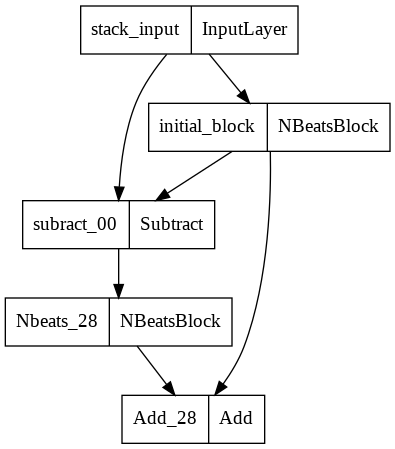

In [119]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [120]:
# Save our model
model_7.save(model_7.name)

# Creating an ensemble(stacking different models together)

In [121]:
# Constructing and fitting an ensemble of models using different loss functions
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        n_iter = 10,
                        epochs = 100,
                        loss_fns = ["mae", "mse", "mape"]):
  ensemble_models = []

  for i in range(n_iter):

    for loss_function in loss_fns:
      print(f"Optimizing ensemble model by reducing: {loss_fns} for {epochs} epochs, model: {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      model.compile(loss= [loss_function],
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = [loss_fns])
      
      history_model_8 = model.fit(train_data,
                epochs = 100,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor= "val_loss", patience=200, restore_best_weights= True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor= "val_loss", patience= 100, verbose=1)])
      ensemble_models.append(model)

  return ensemble_models
      

In [122]:
ensemble_models = get_ensemble_models(n_iter = 5,
                                      epochs = 1000)
ensemble_models

Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 0
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 0
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 0
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 1
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 1
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 1
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 2
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 2
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 2
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 3
Optimizing ensemble model by reducing: ['mae', 'mse', 'mape'] for 1000 epochs, model: 3
Optimizing ensemble model by red

# Making predictions with an ensemble models

In [123]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [124]:
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds[:5]

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 47ms/step


<tf.Tensor: shape=(5, 556), dtype=float32, numpy=
array([[ 8821.383 ,  8755.521 ,  8986.545 , ..., 49371.414 , 50055.688 ,
        47029.27  ],
       [ 8811.028 ,  8918.632 ,  9018.542 , ..., 50277.207 , 46879.848 ,
        45926.473 ],
       [ 8500.3545,  8557.391 ,  8772.683 , ..., 47942.31  , 46375.477 ,
        43839.047 ],
       [ 9060.265 ,  8849.902 ,  8909.282 , ..., 48716.445 , 49284.836 ,
        46659.156 ],
       [ 8987.518 ,  8636.298 ,  8781.354 , ..., 50224.46  , 49399.273 ,
        46233.305 ]], dtype=float32)>

In [125]:
# Evaluate ensemble models predictions
ensemble_results = evaluate_preds(y_test, np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 597.5932,
 'mse': 1248506.9,
 'mrse': 1117.3661,
 'mape': 2.6887975,
 'mase': 0.9989879}

# Ploting the prediction interval(uncertainty estimates) of our ensemble.

In [126]:
# Get the upper and lower boundaries of our predictions

def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis= 0)
  # Multiply the standard deviation by 1.96
  interval = 1.96 * std
  # Get the upper and lower boundaries

  preds_mean = tf.reduce_mean(preds)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [127]:
lower, upper = get_upper_lower(preds= ensemble_preds)

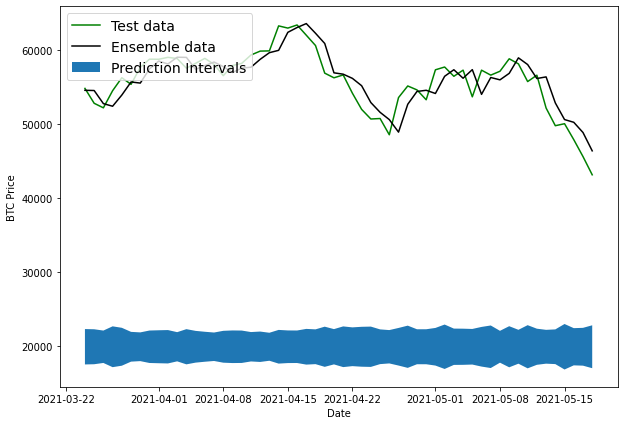

In [128]:
ensemble_median = np.median(ensemble_preds, axis = 0)

offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label = "Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label= "Ensemble data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], (lower)[offset:], (upper)[offset:], label= "Prediction Intervals")
plt.legend(loc= "upper left", fontsize = 14);

# Model 9: Train a model on full historical data to make predictions into future.

In [129]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,25,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,25,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,25,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [130]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis = 1).to_numpy()
y_all = bitcoin_prices_windowed["Price"].to_numpy()

In [131]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

dataset_all = dataset_all.batch(1024).prefetch(tf.data.AUTOTUNE)
dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [132]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation= "relu"),
    layers.Dense(128, activation= "relu"),
    layers.Dense(HORIZON)
], name = "model_9_all")

# Compile the model
model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
history_model_9 = model_9.fit(dataset_all,
                              epochs = 100,
                              verbose = 0)

In [133]:
INTO_FUTURE = 14

def make_future_forecast(values, model, into_future, window_size= WINDOW_SIZE) -> list:
  forecast_future = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):
    future_preds = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Predicting on: {last_window} \n ->  prediction: {tf.squeeze(future_preds).numpy()}\n")

    forecast_future.append(tf.squeeze(future_preds).numpy())

    last_window = np.append(last_window, future_preds)[-WINDOW_SIZE:]

  return forecast_future 

In [134]:
future_forecast = make_future_forecast(values = y_all,
                                       model = model_9,
                                       into_future = INTO_FUTURE,
                                       window_size = WINDOW_SIZE)

1/1 [==============================] - 0s 39ms/step
Predicting on: [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] 
 ->  prediction: 55881.53125

1/1 [==============================] - 0s 14ms/step
Predicting on: [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55881.53125   ] 
 ->  prediction: 51063.06640625

1/1 [==============================] - 0s 15ms/step
Predicting on: [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55881.53125    51063.06640625] 
 ->  prediction: 48624.88671875

1/1 [==============================] - 0s 13ms/step
Predicting on: [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55881.53125    51063.06640625 48624.88671875] 
 ->  prediction: 48238.29296875

1/1 [==============================] - 0s 15ms/step
Predicting on: [47885.62525472 45604.61575361 43144.47129086 55881.53125
 51063.06640625 48624.88671875 48238.29296

In [135]:
future_forecast[:10]

[55881.53,
 51063.066,
 48624.887,
 48238.293,
 48016.418,
 47004.75,
 48464.332,
 54163.51,
 49864.21,
 47810.637]

In [140]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")

  return np.arange(start_date, end_date, dtype = "datetime64[D]")

In [141]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [142]:
next_time_steps = get_future_dates(start_date=last_timestep, into_future= INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [143]:
# Let's add last_timestep and btc_price to our next_time_steps and future_forecast
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55881.53 , 51063.066, 48624.887, 48238.293, 48016.418,
        47004.75 , 48464.332, 54163.51 , 49864.21 , 47810.637, 48372.215,
        49084.75 , 48913.086, 50547.562], dtype=float32))

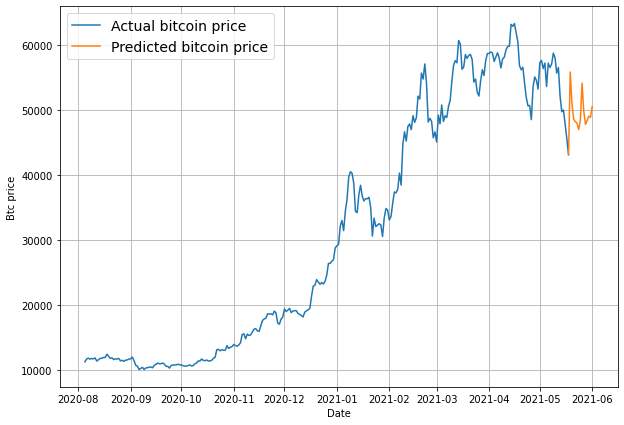

In [144]:
# Plot future prediction prices of bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start= 2500, format="-", label= "Actual bitcoin price")
plot_time_series(next_time_steps, future_forecast,format= "-", label= "Predicted bitcoin price")

## Model 10: Why forecasting is bullshit(The turkey problem)

In [158]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [159]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [160]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

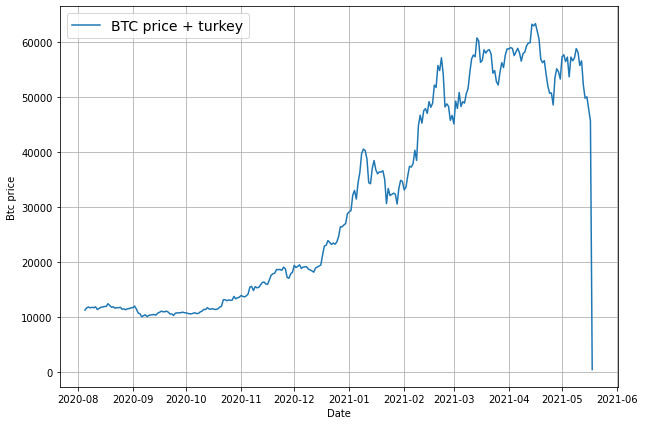

In [161]:
plt.figure(figsize= (10,7))
plot_time_series(timesteps = btc_timesteps_turkey, values = btc_price_turkey, format= "-", start = 2500, label = "BTC price + turkey")

In [162]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size= WINDOW_SIZE, horizon= HORIZON)
full_windows, full_labels

Window steps: [[0 1 2 3 4 5 6 7]]


(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [  431.44471291]]))

In [164]:
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_test), len(X_train), len(y_train), len(y_test)

(556, 2224, 2224, 556)

In [167]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "turkey_model"
# Compile the model
turkey_model.compile(loss = "mae",
                     optimizer = tf.keras.optimizers.Adam())

# Fit the model
history_model_10 = turkey_model.fit(X_train,
                                    y_train,
                                    epochs = 100,
                                    verbose = 1,
                                    validation_data = (X_test, y_test),
                                    callbacks = [create_model_checkpoint_callback(turkey_model.name)])

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 434.3144 - val_loss: 982.3674
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 159.4853 - val_loss: 898.3820
Epoch 3/100
70/70 [==============================] - 1s 8ms/step - loss: 142.6977 - val_loss: 799.8416
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 136.9095 - val_loss: 771.7654
Epoch 5/100
70/70 [==============================] - 1s 8ms/step - loss: 130.1585 - val_loss: 759.2928
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 130.3077 - val_loss: 788.5497
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 123.4156 - val_loss: 685.3562
Epoch 8/100
70/70 [==============================] - 1s 8ms/step - loss: 128.1919 - val_loss: 680.1340
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 123.9880 - val_loss: 991.5214
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss

In [168]:
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 773.0934


773.0933837890625

In [170]:
turkey_model = tf.keras.models.load_model("model_experiments/turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 639.0956


639.0956420898438

In [171]:
turkey_model_preds = turkey_model.predict(X_test)
turkey_model_preds

18/18 [==============================] - 0s 2ms/step


array([[ 8859.51  ],
       [ 8805.324 ],
       [ 9071.095 ],
       [ 8791.664 ],
       [ 8763.561 ],
       [ 8752.185 ],
       [ 8706.117 ],
       [ 8537.967 ],
       [ 8478.735 ],
       [ 8554.666 ],
       [ 8265.055 ],
       [ 8133.0186],
       [ 8083.584 ],
       [ 7679.8066],
       [ 7292.4326],
       [ 7281.063 ],
       [ 7081.7686],
       [ 7201.29  ],
       [ 7148.0176],
       [ 7509.0166],
       [ 7436.902 ],
       [ 7726.943 ],
       [ 7595.546 ],
       [ 7431.629 ],
       [ 7352.278 ],
       [ 7338.8057],
       [ 7252.748 ],
       [ 7391.7983],
       [ 7526.2363],
       [ 7566.661 ],
       [ 7573.3467],
       [ 7378.434 ],
       [ 7270.0835],
       [ 7217.132 ],
       [ 7213.1494],
       [ 7253.449 ],
       [ 7118.1543],
       [ 7124.216 ],
       [ 6921.164 ],
       [ 6625.581 ],
       [ 7347.0225],
       [ 7226.873 ],
       [ 7179.232 ],
       [ 7262.6963],
       [ 7285.1846],
       [ 7219.251 ],
       [ 7237.3027],
       [ 7243

In [174]:
turkey_model_results = evaluate_preds(y_true = tf.squeeze(y_test),
                                      y_pred = tf.squeeze(turkey_model_preds))
turkey_model_results

{'mae': 639.0956,
 'mse': 4843795.0,
 'mrse': 2200.8623,
 'mape': 21.428963,
 'mase': 0.99899095}

In [175]:
model_1_results

{'mae': 568.5498,
 'mse': 1172587.4,
 'mrse': 1082.8607,
 'mape': 2.549229,
 'mase': 0.9989879}

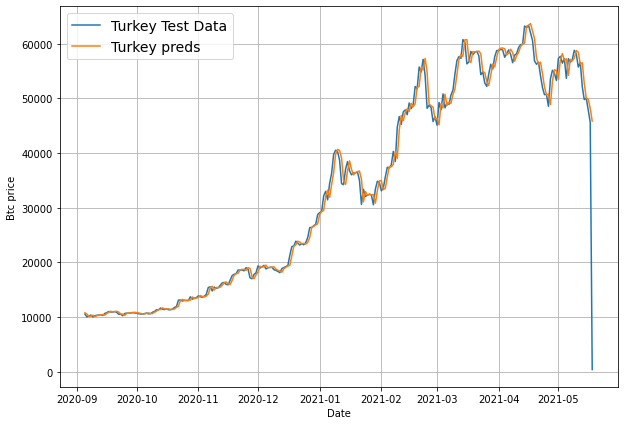

In [176]:
plt.figure(figsize=(10,7))
offset = 300

plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = btc_price_turkey[-len(y_test):],
                 format= "-",
                 label= "Turkey Test Data",
                 start = offset)
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = turkey_model_preds,
                 format = "-",
                 label = "Turkey preds",
                 start = offset)

# Compare model

In [177]:

# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATs": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_model_results}).T
model_results.head(10)
     

,mae,mse,mrse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.998990
model_1_dense_w7_h1,568.549805,1172587.375,1082.860718,2.549229,0.998988
model_2_dense_w30_h1,584.789490,1208050.750,1099.113647,2.640646,0.998973
model_3_dense_w30_h7,1236.207520,5459194.000,1421.614258,5.590653,0.998982
model_4_CONV1D,569.032715,1169841.250,1081.592041,2.551526,0.998988
model_5_LSTM,565.586792,1158285.500,1076.236694,2.537018,0.998988
model_6_multivariate,567.829163,1163727.500,1078.761963,2.546015,0.998988
model_7_NBEATs,568.343201,1165334.750,1079.506714,2.557963,0.998988
model_8_ensemble,597.593201,1248506.875,1117.366089,2.688797,0.998988
model_10_turkey,639.095581,4843795.000,2200.862305,21.428963,0.998991


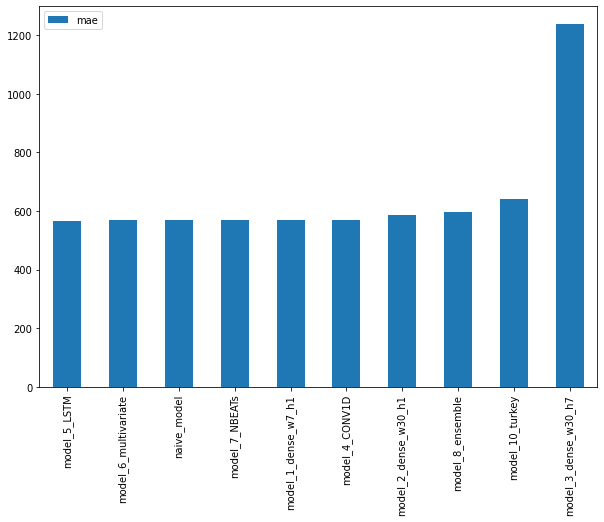

In [178]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind="bar");